In [1]:
import os
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from openpyxl import load_workbook

from scipy import stats as stats
from copy import copy as copy



In [2]:
# from functions.functions import test_print

# from functions.plotting import plot_SA_Hist
# from functions.plotting import draw_probe_plot
# from functions.plotting import probe_GeoMean_Plots
# from functions.plotting import binding_density_plot

from functions.masterdata import master_data



In [3]:
# read in paths from config file

configDict = {
    'rootDir': '',
    'initialDataPath' : '',
    'QCDataPath' : '',
    # 'labWorksheet01Path':'',
    'projectName':''
}

# with open(os.path.join(workingDir, 'config.txt'),'r') as f:
with open('config.txt','r') as f:
    lines = f.readlines()
    for line in lines:
        if not line.startswith('#'):
            line = line.strip()
            fields = line.split(':')

            if fields[0].strip()=='initialDataPath':
                configDict[fields[0].strip()] = fields[1].strip().strip('\'')
            else:
                configDict[fields[0].strip()] = fields[1].strip().strip('\'')
## ToDo: Add checks to ensure that minimal fields have been populated. Raise errors or warnings


In [4]:
configDict

{'rootDir': '/Users/upton6/Documents/Nanostring/Projects/NS_Coeliac/DSP_Output/',
 'initialDataPath': 'Initial Dataset.xlsx',
 'QCDataPath': 'Default_QC.xlsx',
 'projectName': 'Subramaniam_msWTA',
 'DCCPath': ''}

# Define functions

In [5]:
# class master_data:
#     def __init__(self, dataPath):
#         ### import data from excel workbook
        
#         self.wb = load_workbook(dataPath)
#         self.segWs = self.wb['SegmentProperties']
#         self.cntWs = self.wb['BioProbeCountMatrix']
        
#         self.segValues = [[y.value for y in x] for x in self.segWs[self.segWs.calculate_dimension()]]
#         self.cntValues = [[y.value for y in x] for x in self.cntWs[self.cntWs.calculate_dimension()]]

#         self.dropData = False
        
        
#     def get_data(self):
#         ### Convert nested list to a pandas dataFrame and extract expression data with labels
#         cntData = self.cntValues
#         cntCols = self.cntValues[0]
#         df = pd.DataFrame(self.cntValues)
#         cntIndex = [x[0] for x in self.cntValues[1:]]
#         cntDF = pd.DataFrame(self.cntValues[1:], index=cntIndex, columns=cntCols)
#         self.counts = cntDF.iloc[:,12:]
#         self.counts = self.counts.astype(np.float64)      # Convert datatype to float64
#         self.priobeInfo = cntDF.iloc[:,:12]
#         segCols = self.segValues[0]
#         segIndex = [x[4].replace(' | ',('_')) for x in self.segValues[1:]]
#         self.segData = pd.DataFrame(self.segValues[1:], index=segIndex, columns=segCols)

#         self.dataOrig = self.counts.copy()
#         self.dataLog1 = np.log2(self.counts+1)            # Log transform data for QC and analysis steps

#         self.probeClass = False                           # Keep a copy of the original data before transformation or normalisation
#         # self.probeClass = df.iloc[self.targIdx:,2]      ### Index needs updating here also
#         # self.probeClass.rename(index=rowLabels, inplace=True)
#         # self.probeClass.rename(index='ProbeClass', inplace=True)

#         # ToDo: Need to update probeclass handling and labeling
        
#         self.probeClassDict = {
#             'Positive': 'A',
#             'Negative': 'B',
#             'Control': 'C',
#             'Endogenous': 'E'}

#         return(self.counts, self.priobeInfo, self.segData)

#     def get_descriptors(self):
#         pass

#     def add_class_mean(self, df):
#         pass

#     def drop_AOIs(self, includes, writeOrig=False):
#         pass
        
#     def set_threshold(self, threshold):
#         self.threshold = threshold
#         # ToDo: Check that all values in master data are also included in threshold dataFrame
#         # ToDo: Convert threshold data to 0/1 data if needed

#     def drop_probes(self, labels):
#         pass
        


In [6]:
class threshold_probes:
    def __init__(self, data, bins):
        
        self.data = data.drop(labels=['mean','probeClass'], axis=1)
        self.bins = bins
        self.thisHist = plt.hist(self.data.values.flatten(), bins = self.bins)

    def zoom_plot(self, start, end):
        plt.hist(self.data.values.flatten(), bins = self.bins)
        plt.xlim(0,3)        
        
    def check_threshold(self, start, end):
        print(self.thisHist[0][start:end])
        print(self.thisHist[1][start:end])

    def set_threshold_idx(self, idx):
        print(self.thisHist[0][idx])
        print(self.thisHist[1][idx])
        
        self.threshold_idx = idx
        self.threshold = self.thisHist[1][idx]

    def get_filter(self):
        self.ETfilter = self.data >= self.threshold
        return(self.ETfilter)


# Import data from Nanostring initial dataset file.

In [7]:
dataPath = os.path.join(configDict['rootDir'],configDict['initialDataPath'])
dataPath = os.path.join(configDict['rootDir'],configDict['QCDataPath'])

masterData = master_data(dataPath)


counts, probes, segs = masterData.get_data()


counts

# probes

# segs

/Users/upton6/anaconda3/envs/nanoeda/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,TRI-QUT Coeliac Study_TMA Block 4 | 001 | Segment 1,TRI-QUT Coeliac Study_TMA Block 4 | 001 | Segment 2,TRI-QUT Coeliac Study_TMA Block 4 | 002 | Segment 1,TRI-QUT Coeliac Study_TMA Block 4 | 002 | Segment 2,TRI-QUT Coeliac Study_TMA Block 4 | 003 | Segment 1,TRI-QUT Coeliac Study_TMA Block 4 | 003 | Segment 2,TRI-QUT Coeliac Study_TMA Block 4 | 004 | Segment 1,TRI-QUT Coeliac Study_TMA Block 4 | 004 | Segment 2,TRI-QUT Coeliac Study_TMA Block 4 | 005 | Segment 1,TRI-QUT Coeliac Study_TMA Block 4 | 005 | Segment 2,...,TRI-QUT Coeliac Study_TMA Block 1 | 026 | Segment 1,TRI-QUT Coeliac Study_TMA Block 1 | 026 | Segment 2,TRI-QUT Coeliac Study_TMA Block 1 | 027 | Segment 1,TRI-QUT Coeliac Study_TMA Block 1 | 027 | Segment 2,TRI-QUT Coeliac Study_TMA Block 1 | 028 | Segment 1,TRI-QUT Coeliac Study_TMA Block 1 | 028 | Segment 2,TRI-QUT Coeliac Study_TMA Block 1 | 029 | Segment 1,TRI-QUT Coeliac Study_TMA Block 1 | 029 | Segment 2,TRI-QUT Coeliac Study_TMA Block 1 | 030 | Segment 1,TRI-QUT Coeliac Study_TMA Block 1 | 030 | Segment 2
48107,149.0,50.0,297.0,67.0,234.0,29.0,447.0,43.0,612.0,47.0,...,279.0,24.0,484.0,52.0,366.0,21.0,121.0,44.0,412.0,53.0
45080,125.0,50.0,144.0,55.0,208.0,42.0,190.0,59.0,162.0,43.0,...,151.0,34.0,197.0,56.0,71.0,22.0,139.0,66.0,185.0,71.0
48627,61.0,45.0,64.0,49.0,91.0,24.0,71.0,31.0,73.0,34.0,...,80.0,24.0,63.0,40.0,20.0,16.0,97.0,36.0,89.0,34.0
36143,41.0,24.0,75.0,49.0,68.0,26.0,62.0,38.0,69.0,25.0,...,93.0,29.0,60.0,38.0,26.0,20.0,87.0,71.0,83.0,51.0
41381,53.0,37.0,70.0,51.0,79.0,23.0,69.0,35.0,41.0,29.0,...,77.0,19.0,52.0,27.0,30.0,9.0,95.0,58.0,94.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44262,133.0,79.0,127.0,100.0,211.0,50.0,195.0,74.0,162.0,49.0,...,195.0,52.0,190.0,87.0,76.0,37.0,185.0,98.0,178.0,82.0
37145,42.0,42.0,41.0,50.0,47.0,28.0,62.0,31.0,44.0,28.0,...,54.0,19.0,45.0,39.0,26.0,12.0,66.0,38.0,71.0,35.0
51325,262.0,66.0,180.0,47.0,452.0,51.0,340.0,61.0,249.0,34.0,...,294.0,43.0,242.0,56.0,131.0,18.0,211.0,59.0,327.0,79.0
50331,70.0,44.0,67.0,51.0,114.0,27.0,87.0,40.0,71.0,30.0,...,85.0,25.0,84.0,39.0,28.0,9.0,114.0,37.0,109.0,38.0


ToDo: Need to check that column names are unique in SegmentProperties!! KO has 2 entries in current version, need to trace down where this has been introduced.

In [8]:
dropCols = ['SlideName', 'ScanLabel', 'ROILabel', 'SegmentLabel',
            'SegmentDisplayName', 'Origin Instrument ID', 'AOISurfaceArea', 
            'AOINucleiCount', 'ROICoordinateX', 'ROICoordinateY', 
            'RawReads', 'AlignedReads', 'DeduplicatedReads', 'TrimmedReads', 
            'StitchedReads', 'SequencingSaturation', 'SequencingSetID', 
            'UMIQ30', 'RTSQ30', 'GeoMxNgsPipelineVersion', 'LOT_Mouse_NGS_Whole_Transcriptome_Atlas_RNA_1_0',
            'ROIID', 'SegmentID', 'ScanWidth', 'ScanHeight', 'ScanOffsetX', 'ScanOffsetY']

keepCols = [x for x in segs.columns if not x in dropCols]

for c in keepCols:
    print(c)
    print(len(set(segs[c])))
    print(set(segs[c]))
    print()

Segment 1
2
{'False', 'True'}

Segment 2
2
{'False', 'True'}

QCFlags
5
{'Low Surface Area,Low Nuclei Count', None, 'Low Surface Area,Low Negative Probe Count for Probe Kit Human NGS Whole Transcriptome Atlas RNA_1.0,Low Nuclei Count', 'Low Negative Probe Count for Probe Kit Human NGS Whole Transcriptome Atlas RNA_1.0', 'Low Nuclei Count'}

LOT_Human_NGS_Whole_Transcriptome_Atlas_RNA_1_0
1
{'HWTA21004'}

Group
3
{'Hookworm', 'Placebo', 'Control'}

Time_point
4
{'Post challenge', 'Baseline', 'Post hookworm', 'Control'}

Clinical_outcome
3
{'Non responder', 'Responder', 'Control'}

Core
69
{'001/002 18_01086_b', '001/025 17_40619_b', '003/015 17_40912_a', '003/015 18_32656_a', '001/015 17_35197_b', '001/010 17_15576_b', '001/003 17_15574_b', '001/015 17_35197_a', '001/028 18_33529_a', '001/022 18_16609_b', '002/003 18_13185_a', '001/028 18_33529_b', '001/018 17_29377', '002/003 18_13185_b', '001/014 17_35196_b', '001/014 18_11840_b', '001/002 18_01086_a', '003/006 18_11645_b', '003/002 1

ToDo: Save drop cols to config file.

   - Work out workflow to allow importing previous drop cols, and working with remaining drop cols to get final list (saving final dropped cols back to config file)





In [9]:
sampleInfoExternal = masterData.segData.copy()

In [10]:
sampleInfoExternal.columns

Index(['SlideName', 'ScanLabel', 'ROILabel', 'SegmentLabel',
       'SegmentDisplayName', 'Origin Instrument ID', 'Segment 1', 'Segment 2',
       'QCFlags', 'AOISurfaceArea', 'AOINucleiCount', 'ROICoordinateX',
       'ROICoordinateY', 'RawReads', 'AlignedReads', 'DeduplicatedReads',
       'TrimmedReads', 'StitchedReads', 'SequencingSaturation',
       'SequencingSetID', 'UMIQ30', 'RTSQ30', 'GeoMxNgsPipelineVersion',
       'LOT_Human_NGS_Whole_Transcriptome_Atlas_RNA_1_0', 'Group',
       'Time_point', 'Clinical_outcome', 'Core', 'ROIID', 'SegmentID',
       'ScanWidth', 'ScanHeight', 'ScanOffsetX', 'ScanOffsetY'],
      dtype='object')

In [11]:
sampleInfoExternal['TrimmedReads']

TRI-QUT Coeliac Study_TMA Block 4_001_Segment 1    15814607.0
TRI-QUT Coeliac Study_TMA Block 4_001_Segment 2     7610612.0
TRI-QUT Coeliac Study_TMA Block 4_002_Segment 1    12867539.0
TRI-QUT Coeliac Study_TMA Block 4_002_Segment 2     8982988.0
TRI-QUT Coeliac Study_TMA Block 4_003_Segment 1    23166422.0
                                                      ...    
TRI-QUT Coeliac Study_TMA Block 1_028_Segment 2     3409925.0
TRI-QUT Coeliac Study_TMA Block 1_029_Segment 1    15322731.0
TRI-QUT Coeliac Study_TMA Block 1_029_Segment 2     8241546.0
TRI-QUT Coeliac Study_TMA Block 1_030_Segment 1    18353061.0
TRI-QUT Coeliac Study_TMA Block 1_030_Segment 2     9505916.0
Name: TrimmedReads, Length: 191, dtype: float64

In [12]:
print(masterData.probeClass)
print(masterData.probeClassDict)
# dataLog1External, sampleInfoExternal = masterData.drop_AOIs('#16_9', writeOrig=True)

nuclei = sampleInfoExternal['AOINucleiCount']
# print(nuclei)
surfArea = sampleInfoExternal['AOISurfaceArea']
# print(surfArea)

# dataLog1External, sampleInfoExternal = masterData.add_class_mean(masterData.dataLog1)

False
{'Positive': 'A', 'Negative': 'B', 'Control': 'C', 'Endogenous': 'E'}


In [13]:
# os.getcwd()

In [14]:
# configDict

In [15]:
# dataPath = os.path.join(configDict['rootDir'],configDict['initialDataPath'])

# masterData = master_data(dataPath)
# dataLog1External, sampleInfoExternal = masterData.get_data()

# # For the Thomas TMA study there are a number of additional AOIs to be used for data normalisation studies.
# # These should be removed before further data analysis and QC.

# print(masterData.probeClass)
# print(masterData.probeClassDict)
# # dataLog1External, sampleInfoExternal = masterData.drop_AOIs('#16_9', writeOrig=True)

# nuclei = sampleInfoExternal.loc['AOI nuclei count']
# surfArea = sampleInfoExternal.loc['AOI surface area']

# dataLog1External, sampleInfoExternal = masterData.add_class_mean(masterData.dataLog1)

In [16]:
# ### import data from excel workbook

# # wb = load_workbook('../../../Documents/Nanostring/projects/Dando/DSP_Analysis_Suite/Initial Dataset.xlsx')
# wb = load_workbook('../../../Documents/Nanostring/projects/McGovern/msWTA/Initial Dataset.xlsx')

# print(wb.sheetnames)


In [17]:
# ws = wb['SegmentProperties']

# segments = [[y.value for y in x] for x in ws[ws.calculate_dimension()]]
# segments

In [18]:
# ### Convert nested list to a pandas dataFrame and extract expression data with labels
# segs = pd.DataFrame(segments)
# segs.rename(columns=segs.loc[0], inplace=True)
# segs.drop(index=0, inplace=True)
# segs.reset_index(inplace=True, drop=True)
# segs

In [19]:
# segs.loc[segs['SlideName'] == 'Ms_OB_TMEM_8um_2022_08_18'].shape

In [20]:
slides = set(segs['SlideName'])

colLookup = dict(zip(slides,range(len(slides))))

In [21]:
colLookup

{'TRI-QUT Coeliac Study_TMA Block 2': 0,
 'TRI-QUT Coeliac Study_TMA Block 1': 1,
 'TRI-QUT Coeliac Study_TMA Block 4': 2,
 'TRI-QUT Coeliac Study_TMA Block 3': 3}

In [22]:
colMap = [colLookup[x]/len(slides) for x in segs['SlideName']]

# colMap = [colLookup[x] for x in segs['SlideName']]


In [23]:
colMap 

[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,


In [24]:
sum(segs['RawReads'])

2137431331

In [25]:
# plot aoi size vs read number

ToDo: Convert the following to subplots in a single figure

 - Add titles
 - Add legends

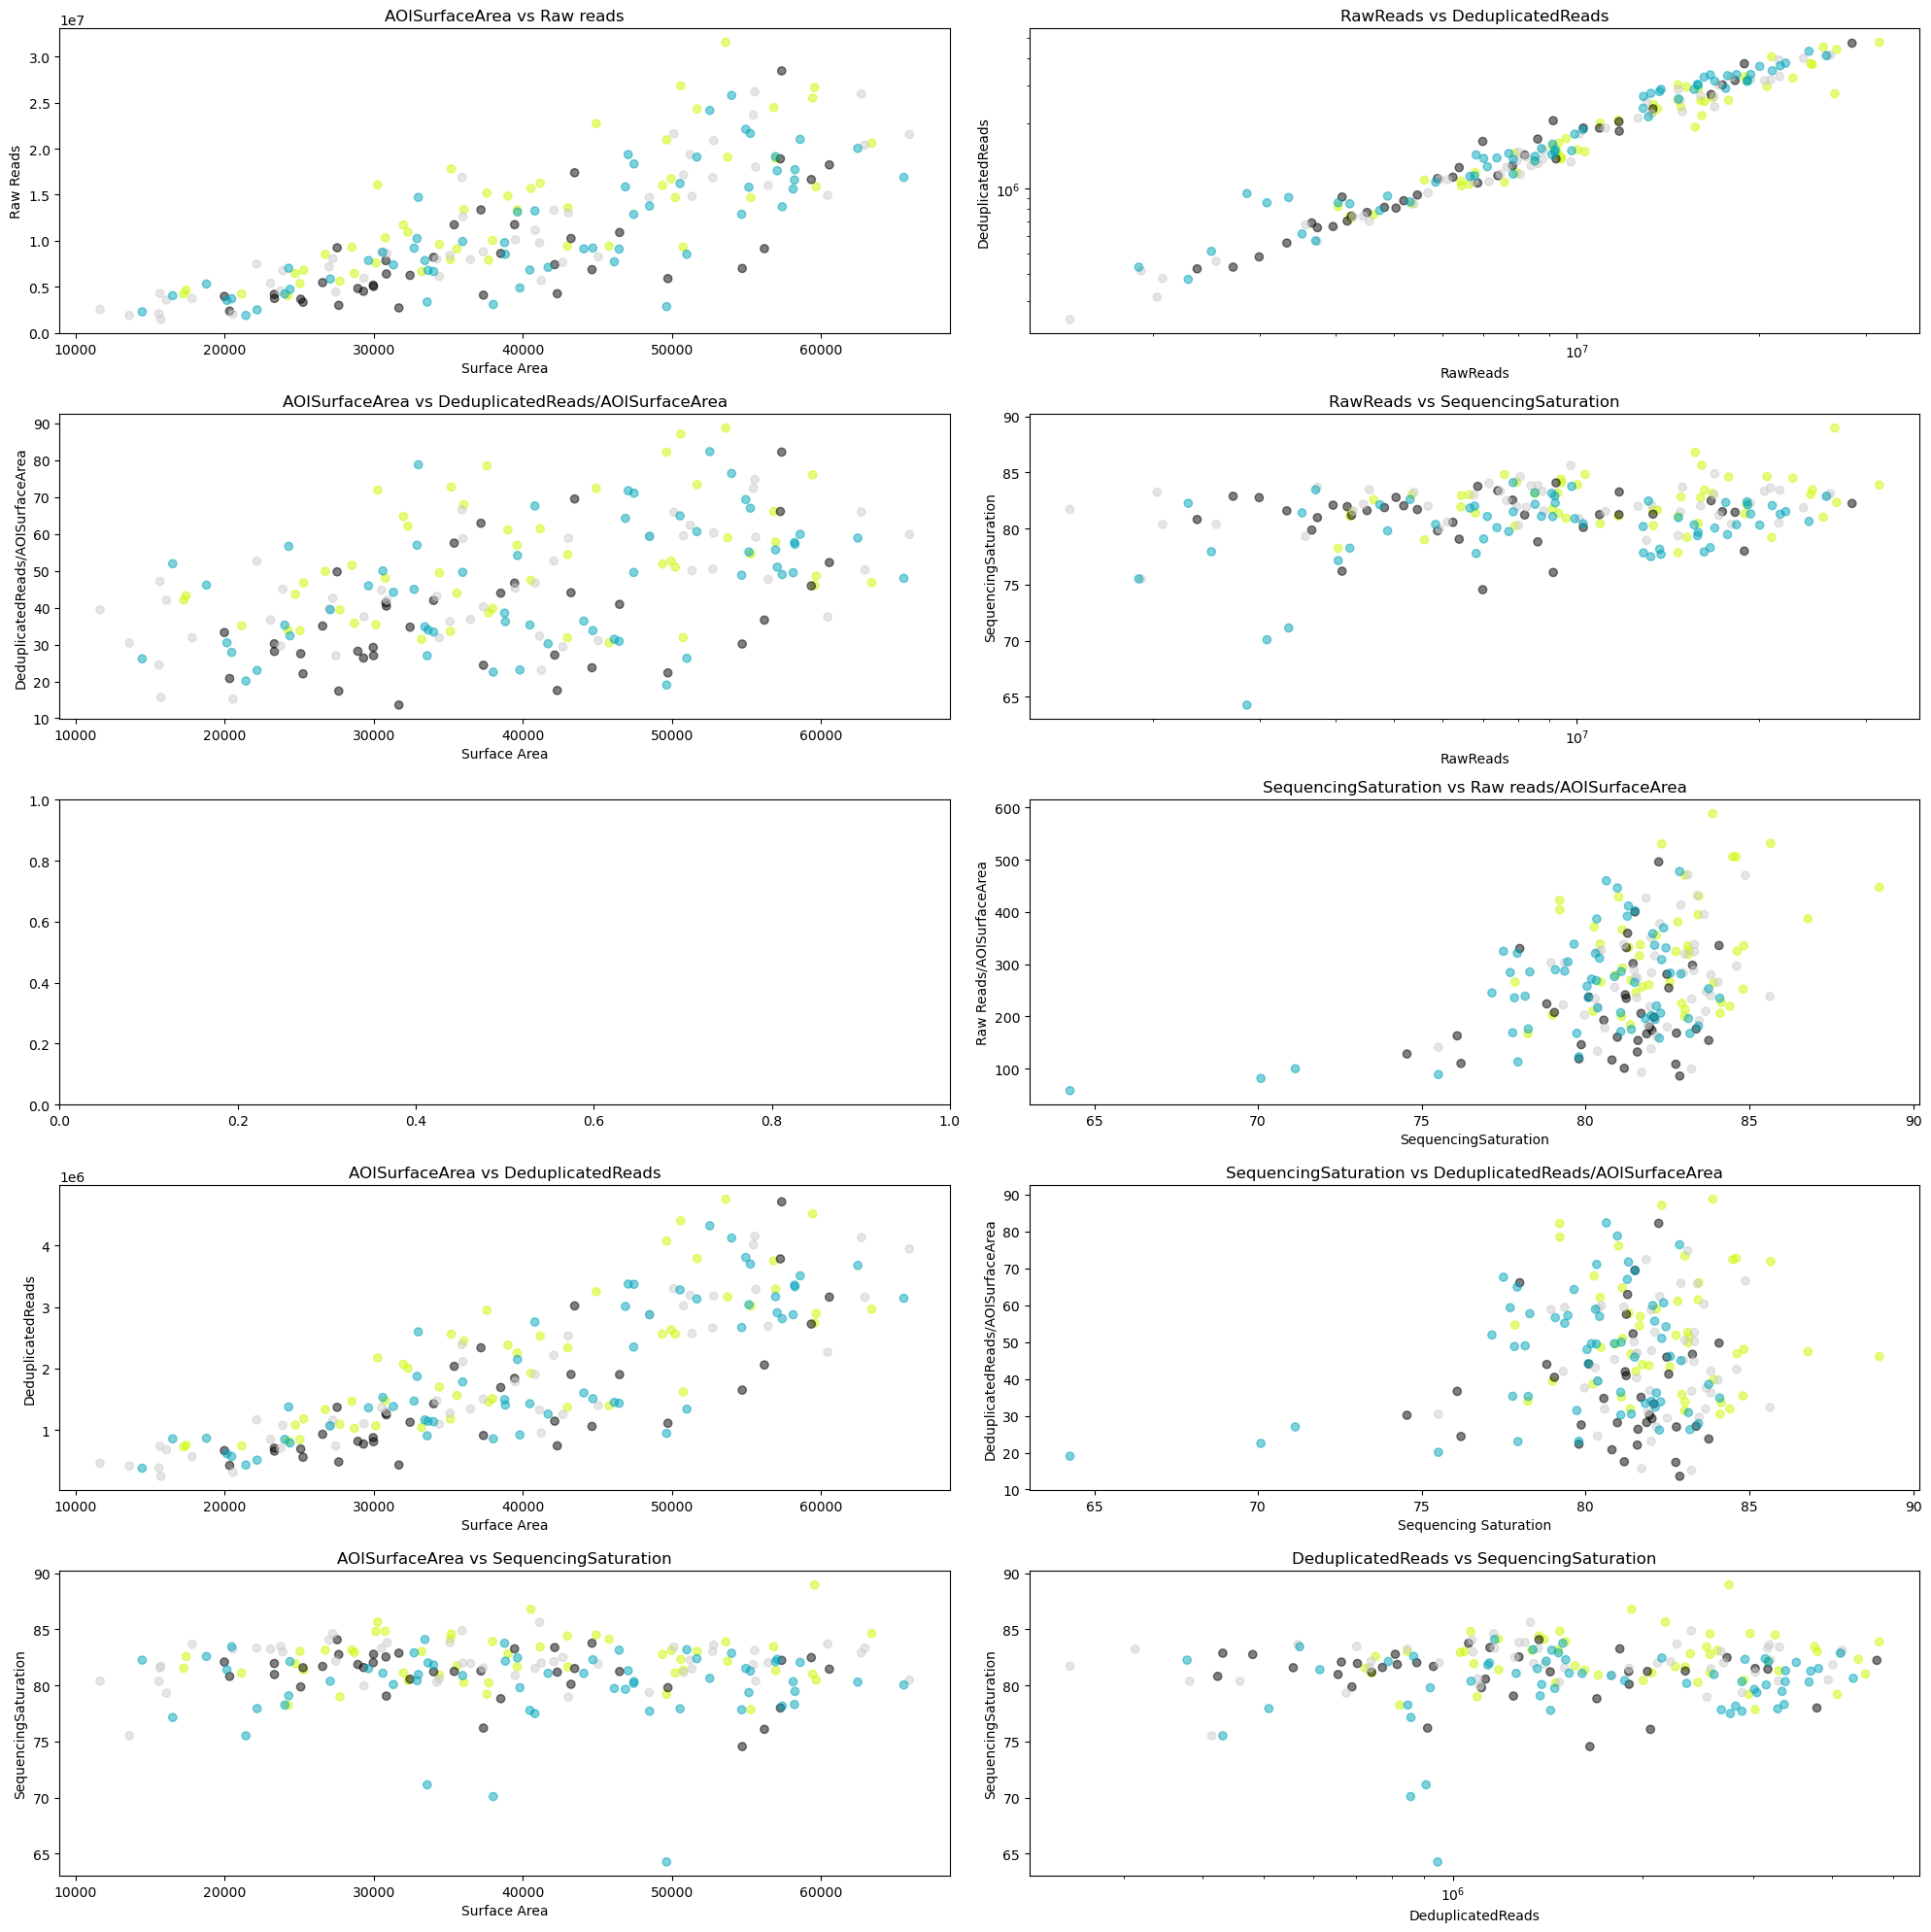

In [26]:
fig, ax = plt.subplots(5,2, figsize=[20,20])


ax[0][0].scatter(segs['AOISurfaceArea'],segs['RawReads'],alpha=0.5, c=colMap, cmap='nipy_spectral')
ax[0][0].set_title('AOISurfaceArea vs Raw reads')
ax[0][0].set_xlabel('Surface Area')
ax[0][0].set_ylabel('Raw Reads')

ax[1][0].scatter(segs['AOISurfaceArea'],(segs['DeduplicatedReads']/segs['AOISurfaceArea']),alpha=0.5, c=colMap, cmap='nipy_spectral')
ax[1][0].set_title('AOISurfaceArea vs DeduplicatedReads/AOISurfaceArea')
ax[1][0].set_xlabel('Surface Area')
ax[1][0].set_ylabel('DeduplicatedReads/AOISurfaceArea')

ax[3][0].scatter(segs['AOISurfaceArea'],segs['DeduplicatedReads'],alpha=0.5, c=colMap, cmap='nipy_spectral')
ax[3][0].set_title('AOISurfaceArea vs DeduplicatedReads')
ax[3][0].set_xlabel('Surface Area')
ax[3][0].set_ylabel('DeduplicatedReads')

ax[4][0].scatter(segs['AOISurfaceArea'],segs['SequencingSaturation'],alpha=0.5, c=colMap, cmap='nipy_spectral')
ax[4][0].set_title('AOISurfaceArea vs SequencingSaturation')
ax[4][0].set_xlabel('Surface Area')
ax[4][0].set_ylabel('SequencingSaturation')



ax[0][1].scatter(segs['RawReads'],segs['DeduplicatedReads'],alpha=0.5, c=colMap, cmap='nipy_spectral')
ax[0][1].semilogx()
ax[0][1].semilogy()
ax[0][1].set_title('RawReads vs DeduplicatedReads')
ax[0][1].set_xlabel('RawReads')
ax[0][1].set_ylabel('DeduplicatedReads')

ax[3][1].scatter(segs['SequencingSaturation'],segs['DeduplicatedReads']/segs['AOISurfaceArea'],alpha=0.5, c=colMap, cmap='nipy_spectral')
ax[3][1].set_title('SequencingSaturation vs DeduplicatedReads/AOISurfaceArea')
ax[3][1].set_xlabel('Sequencing Saturation')
ax[3][1].set_ylabel('DeduplicatedReads/AOISurfaceArea')

ax[2][1].scatter(segs['SequencingSaturation'],segs['RawReads']/segs['AOISurfaceArea'],alpha=0.5, c=colMap, cmap='nipy_spectral')
ax[2][1].set_title('SequencingSaturation vs Raw reads/AOISurfaceArea')
ax[2][1].set_xlabel('SequencingSaturation')
ax[2][1].set_ylabel('Raw Reads/AOISurfaceArea')

ax[1][1].scatter(segs['RawReads'],segs['SequencingSaturation'],alpha=0.5, c=colMap, cmap='nipy_spectral')
ax[1][1].semilogx()
ax[1][1].set_title('RawReads vs SequencingSaturation')
ax[1][1].set_xlabel('RawReads')
ax[1][1].set_ylabel('SequencingSaturation')

ax[4][1].scatter(segs['DeduplicatedReads'],segs['SequencingSaturation'],alpha=0.5, c=colMap, cmap='nipy_spectral')
ax[4][1].semilogx()
ax[4][1].set_title('DeduplicatedReads vs SequencingSaturation')
ax[4][1].set_xlabel('DeduplicatedReads')
ax[4][1].set_ylabel('SequencingSaturation')


plt.tight_layout()
plt.savefig("QC_Plots.svg")
plt.show()

## Set up as selectable x and y axes using 

In [27]:
# plt.scatter(segs['AOISurfaceArea'],segs['RawReads'],alpha=0.5, c=colMap, cmap='nipy_spectral')

In [28]:
# plt.scatter(segs['SequencingSaturation'],segs['RawReads']/segs['AOISurfaceArea'],alpha=0.5, c=colMap, cmap='nipy_spectral')
# plt.semilogy()

In [29]:
# plt.scatter(segs['SequencingSaturation'],segs['DeduplicatedReads']/segs['AOISurfaceArea'],alpha=0.5, c=colMap, cmap='nipy_spectral')


In [30]:
# plt.scatter(segs['AOISurfaceArea'],segs['DeduplicatedReads'],alpha=0.5, c=colMap, cmap='nipy_spectral')
# plt.semilogy()

In [31]:
# plt.scatter(segs['AOISurfaceArea'],(segs['DeduplicatedReads']/segs['AOISurfaceArea']),alpha=0.5, c=colMap, cmap='nipy_spectral')
# plt.semilogy()

In [32]:
# plt.scatter(segs['RawReads'],segs['DeduplicatedReads'],alpha=0.5, c=colMap, cmap='nipy_spectral')
# plt.semilogx()
# plt.semilogy()

In [33]:
# segs['SequencingSaturation'].mean()

In [34]:
# segs['SequencingSaturation'].min()

In [35]:
# segs['SequencingSaturation'].max()

In [36]:
# sum(segs['SequencingSaturation']<50.0)

In [37]:
# sum(segs['SequencingSaturation']>=50.0)

In [38]:
# plt.scatter(segs['AOISurfaceArea'],segs['SequencingSaturation'],alpha=0.25, c=colMap, cmap='nipy_spectral')

In [39]:
# plt.scatter(segs.loc[segs['SlideName'] == 'RB15P48811_SOETENS. 1.A']['AOISurfaceArea'],segs.loc[segs['SlideName'] == 'RB15P48811_SOETENS. 1.A']['SequencingSaturation'])

# # segs.loc[segs['SlideName'] == 'RB15P48811_SOETENS. 1.A']['AOISurfaceArea']

In [40]:
# plt.scatter(segs['DeduplicatedReads'],segs['SequencingSaturation'],alpha=0.25, c=colMap, cmap='nipy_spectral')
# plt.semilogx()


In [41]:
# plt.scatter(segs['RawReads'],segs['SequencingSaturation'],alpha=0.2, c=colMap, cmap='nipy_spectral')
# plt.semilogx()
# plt.xlim(0,1E8)
# plt.ylim(0,100)
# # 

In [42]:
# plt.scatter(segs.loc[segs['SlideName'] == 'RB15P48811_SOETENS. 1.A']['RawReads'],segs.loc[segs['SlideName'] == 'RB15P48811_SOETENS. 1.A']['SequencingSaturation'])
# plt.xlim(0,1E8)
# plt.ylim(0,100)


In [43]:
# plt.scatter(segs['RawReads'],segs['DeduplicatedReads'],alpha=0.25, c=colMap, cmap='nipy_spectral')
# plt.semilogx()
# plt.semilogy()


# Investigate NTC wells


ToDo: Load in DCC data and parse info

 - Tie in with config file

In [44]:
dataPath = "/Users/upton6/Library/CloudStorage/OneDrive-QueenslandUniversityofTechnology/Documents/Nanostring/Projects/NS_msWTA/DND"

In [45]:
files = os.listdir(dataPath)
files = [x for x in files if x.endswith('.dcc')]

In [46]:
files

['DSP-1001660011354-B-A12.dcc',
 'DSP-1001660011354-B-A06.dcc',
 'DSP-1001660011355-A-C07.dcc',
 'DSP-1001660011354-B-C10.dcc',
 'DSP-1001660011354-B-C04.dcc',
 'DSP-1001660011355-A-A05.dcc',
 'DSP-1001660011355-A-A11.dcc',
 'DSP-1001660011354-B-E02.dcc',
 'DSP-1001660011354-B-D11 - F06T6WFQGG.dcc',
 'DSP-1001660011354-B-F12 - F06T6WFQGG.dcc',
 'DSP-1001660011355-A-G03.dcc',
 'DSP-1001660011355-A-B02 - F06T6WFQGG.dcc',
 'DSP-1001660011355-A-F04 - F06T6WFQGG.dcc',
 'DSP-1001660011355-A-D07 - F06T6WFQGG.dcc',
 'DSP-1001660011355-A-G03 - F06T6WFQGG.dcc',
 'DSP-1001660011355-A-E01.dcc',
 'DSP-1001660011355-A-C05 - F06T6WFQGG.dcc',
 'DSP-1001660011355-A-A06 - F06T6WFQGG.dcc',
 'DSP-1001660011354-B-H09 - F06T6WFQGG.dcc',
 'DSP-1001660011354-B-G01.dcc',
 'DSP-1001660011354-B-E09 - F06T6WFQGG.dcc',
 'DSP-1001660011355-A-G02.dcc',
 'DSP-1001660011354-B-E03.dcc',
 'DSP-1001660011355-A-A10.dcc',
 'DSP-1001660011355-A-A04.dcc',
 'DSP-1001660011354-B-C05.dcc',
 'DSP-1001660011354-B-C11.dcc',
 'DSP-

In [47]:
thisFile = os.path.join(dataPath, "DSP-1001660011355-A-A01.dcc")
thisFile = os.path.join(dataPath, "DSP-1001660011354-B-A01.dcc")
# thisFile = os.path.join(dataPath, "DSP-1001660011355-A-A01.dcc")


In [48]:
with open(thisFile, 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        print(line)
    # print(lines)

<Header>
FileVersion,0.02
SoftwareVersion,"GeoMx_NGS_Pipeline_2.3.3.10"
Date,2023-5-30
</Header>

<Scan_Attributes>
ID,DSP-1001660011354-B-A01
Plate_ID,1001660011354
Well,A01
</Scan_Attributes>

<NGS_Processing_Attributes>
SeqSetId,A00632:364:H533GDRX3
Raw,44250
Trimmed,36394
Stitched,496
Aligned,96
umiQ30,0.9950
rtsQ30,0.9918
</NGS_Processing_Attributes>


<Code_Summary>
RTS0065152,1
RTS0066741,1
RTS0069104,1
RTS0073075,1
RTS0073206,1
RTS0079236,1
</Code_Summary>


In [49]:
# dccPath = '../../../Documents/Nanostring/projects/Dando/DCC-2023XXXX/'

In [50]:
# walkOut = os.walk(dccPath)

In [51]:
# files = list(walkOut)[0][2]

In [52]:
# files

In [53]:
# NTCs = []
# for f in files:
#     if f.endswith('A01.dcc'):
#         NTCs.append(os.path.join(dccPath,f))
# #         print(f)
    

In [54]:
# NTCs

In [55]:
# NTCs = []
# for ntc in files:
#     if ntc.endswith('A01.dcc'):
#         print(ntc)
# #         NTCs.append(os.path.join(dccPath,ntc))
#         with open (os.path.join(dccPath,ntc),'r') as f:
#             counts = []
#             lines = f.readlines()
#             for line in lines[25:-1]:
# #                 print(line)
#                 counts.append(line.strip().split(','))
#             ds = pd.Series([x[1] for x in counts], index = [x[0] for x in counts], name=ntc.split('-')[1])
#             print(ds.shape)
#             NTCs.append(ds)
# #         break
        
        
        
# #         print(f)
    

In [56]:
# ds

In [57]:
# NTCFrame = pd.concat(NTCs, axis=1)
# NTCFrame.fillna(0, inplace=True)

In [58]:
# NTCFrame

In [59]:
# NTCFrame = NTCFrame.astype('int32')

In [60]:
# NTCFrame.dtypes

In [61]:
# NTCFrame.sum()

In [62]:

# for ntc in NTCs:
#     with open (ntc,'r') as f:
#         counts = []
#         lines = f.readlines()
#         for line in lines[25:-1]:
#             print(line)
#             counts.append(line.strip())
            
#         ds = pd.Series(counts, name=)
#     break
        
        

# Investigate Probe Matrix Counts


In [63]:
# ws = wb['BioProbeCountMatrix']

# counts = [[y.value for y in x] for x in ws[ws.calculate_dimension()]]
# counts

In [64]:
# ### Convert nested list to a pandas dataFrame and extract expression data with labels
# counts = pd.DataFrame(counts)
# counts.rename(columns=counts.loc[0], inplace=True)
# counts.drop(index=0, inplace=True)
# counts.reset_index(inplace=True, drop=True)
# counts

In [65]:
counts.columns

Index(['TRI-QUT Coeliac Study_TMA Block 4 | 001 | Segment 1',
       'TRI-QUT Coeliac Study_TMA Block 4 | 001 | Segment 2',
       'TRI-QUT Coeliac Study_TMA Block 4 | 002 | Segment 1',
       'TRI-QUT Coeliac Study_TMA Block 4 | 002 | Segment 2',
       'TRI-QUT Coeliac Study_TMA Block 4 | 003 | Segment 1',
       'TRI-QUT Coeliac Study_TMA Block 4 | 003 | Segment 2',
       'TRI-QUT Coeliac Study_TMA Block 4 | 004 | Segment 1',
       'TRI-QUT Coeliac Study_TMA Block 4 | 004 | Segment 2',
       'TRI-QUT Coeliac Study_TMA Block 4 | 005 | Segment 1',
       'TRI-QUT Coeliac Study_TMA Block 4 | 005 | Segment 2',
       ...
       'TRI-QUT Coeliac Study_TMA Block 1 | 026 | Segment 1',
       'TRI-QUT Coeliac Study_TMA Block 1 | 026 | Segment 2',
       'TRI-QUT Coeliac Study_TMA Block 1 | 027 | Segment 1',
       'TRI-QUT Coeliac Study_TMA Block 1 | 027 | Segment 2',
       'TRI-QUT Coeliac Study_TMA Block 1 | 028 | Segment 1',
       'TRI-QUT Coeliac Study_TMA Block 1 | 028 | Segment 2

In [66]:
# list(counts.columns)[12:]

In [67]:
# AOIs = list(counts.columns)[12:]

In [68]:
# negOrdered = counts.loc[counts['CodeClass'] == 'Negative', AOIs].sum().sort_values().index

In [69]:
# set(counts['CodeClass'])

In [70]:
# plt.figure(figsize=(10,10))
# plt.plot(counts.loc[counts['CodeClass'] == 'Negative', AOIs][negOrdered].T)

In [71]:
# There are no control probes in WTA

# plt.figure(figsize=(10,10))
# plt.plot(counts.loc[counts['CodeClass'] == 'Control', AOIs][negOrdered].T)

In [72]:
# counts.index = counts['TargetName']

In [73]:
# counts.drop(counts.columns[:12], axis=1, inplace = True)

In [74]:
counts.values.flatten().min()

1.0

In [75]:
counts = counts.astype(np.float32)
counts = np.log2(counts)
counts

,TRI-QUT Coeliac Study_TMA Block 4 | 001 | Segment 1,TRI-QUT Coeliac Study_TMA Block 4 | 001 | Segment 2,TRI-QUT Coeliac Study_TMA Block 4 | 002 | Segment 1,TRI-QUT Coeliac Study_TMA Block 4 | 002 | Segment 2,TRI-QUT Coeliac Study_TMA Block 4 | 003 | Segment 1,TRI-QUT Coeliac Study_TMA Block 4 | 003 | Segment 2,TRI-QUT Coeliac Study_TMA Block 4 | 004 | Segment 1,TRI-QUT Coeliac Study_TMA Block 4 | 004 | Segment 2,TRI-QUT Coeliac Study_TMA Block 4 | 005 | Segment 1,TRI-QUT Coeliac Study_TMA Block 4 | 005 | Segment 2,...,TRI-QUT Coeliac Study_TMA Block 1 | 026 | Segment 1,TRI-QUT Coeliac Study_TMA Block 1 | 026 | Segment 2,TRI-QUT Coeliac Study_TMA Block 1 | 027 | Segment 1,TRI-QUT Coeliac Study_TMA Block 1 | 027 | Segment 2,TRI-QUT Coeliac Study_TMA Block 1 | 028 | Segment 1,TRI-QUT Coeliac Study_TMA Block 1 | 028 | Segment 2,TRI-QUT Coeliac Study_TMA Block 1 | 029 | Segment 1,TRI-QUT Coeliac Study_TMA Block 1 | 029 | Segment 2,TRI-QUT Coeliac Study_TMA Block 1 | 030 | Segment 1,TRI-QUT Coeliac Study_TMA Block 1 | 030 | Segment 2
48107,7.219169,5.643856,8.214319,6.066089,7.870365,4.857981,8.804131,5.426265,9.257388,5.554589,...,8.124122,4.584962,8.918863,5.700440,8.515699,4.392317,6.918863,5.459432,8.686501,5.727921
45080,6.965784,5.643856,7.169925,5.781360,7.700440,5.392317,7.569856,5.882643,7.339850,5.426265,...,7.238405,5.087463,7.622052,5.807355,6.149747,4.459432,7.118941,6.044394,7.531382,6.149747
48627,5.930737,5.491853,6.000000,5.614710,6.507795,4.584962,6.149747,4.954196,6.189825,5.087463,...,6.321928,4.584962,5.977280,5.321928,4.321928,4.000000,6.599913,5.169925,6.475733,5.087463
36143,5.357552,4.584962,6.228819,5.614710,6.087463,4.700440,5.954196,5.247928,6.108524,4.643856,...,6.539159,4.857981,5.906890,5.247928,4.700440,4.321928,6.442944,6.149747,6.375040,5.672425
41381,5.727921,5.209454,6.129283,5.672425,6.303781,4.523562,6.108524,5.129283,5.357552,4.857981,...,6.266787,4.247928,5.700440,4.754888,4.906890,3.169925,6.569856,5.857981,6.554589,5.392317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44262,7.055283,6.303781,6.988685,6.643856,7.721099,5.643856,7.607330,6.209454,7.339850,5.614710,...,7.607330,5.700440,7.569856,6.442944,6.247928,5.209454,7.531382,6.614710,7.475733,6.357552
37145,5.392317,5.392317,5.357552,5.643856,5.554589,4.807355,5.954196,4.954196,5.459432,4.807355,...,5.754888,4.247928,5.491853,5.285402,4.700440,3.584963,6.044394,5.247928,6.149747,5.129283
51325,8.033423,6.044394,7.491853,5.554589,8.820179,5.672425,8.409391,5.930737,7.960002,5.087463,...,8.199673,5.426265,7.918863,5.807355,7.033423,4.169925,7.721099,5.882643,8.353147,6.303781
50331,6.129283,5.459432,6.066089,5.672425,6.832890,4.754888,6.442944,5.321928,6.149747,4.906890,...,6.409391,4.643856,6.392317,5.285402,4.807355,3.169925,6.832890,5.209454,6.768184,5.247928


In [76]:
geoCounts = counts.groupby(level=0).mean()
geoCounts

,TRI-QUT Coeliac Study_TMA Block 4 | 001 | Segment 1,TRI-QUT Coeliac Study_TMA Block 4 | 001 | Segment 2,TRI-QUT Coeliac Study_TMA Block 4 | 002 | Segment 1,TRI-QUT Coeliac Study_TMA Block 4 | 002 | Segment 2,TRI-QUT Coeliac Study_TMA Block 4 | 003 | Segment 1,TRI-QUT Coeliac Study_TMA Block 4 | 003 | Segment 2,TRI-QUT Coeliac Study_TMA Block 4 | 004 | Segment 1,TRI-QUT Coeliac Study_TMA Block 4 | 004 | Segment 2,TRI-QUT Coeliac Study_TMA Block 4 | 005 | Segment 1,TRI-QUT Coeliac Study_TMA Block 4 | 005 | Segment 2,...,TRI-QUT Coeliac Study_TMA Block 1 | 026 | Segment 1,TRI-QUT Coeliac Study_TMA Block 1 | 026 | Segment 2,TRI-QUT Coeliac Study_TMA Block 1 | 027 | Segment 1,TRI-QUT Coeliac Study_TMA Block 1 | 027 | Segment 2,TRI-QUT Coeliac Study_TMA Block 1 | 028 | Segment 1,TRI-QUT Coeliac Study_TMA Block 1 | 028 | Segment 2,TRI-QUT Coeliac Study_TMA Block 1 | 029 | Segment 1,TRI-QUT Coeliac Study_TMA Block 1 | 029 | Segment 2,TRI-QUT Coeliac Study_TMA Block 1 | 030 | Segment 1,TRI-QUT Coeliac Study_TMA Block 1 | 030 | Segment 2
11276,5.321928,4.954196,5.523562,5.491853,5.523562,4.247928,5.554589,4.584962,5.614710,4.523562,...,5.614710,4.000000,5.754888,4.523562,4.700440,3.459432,5.954196,5.000000,5.954196,5.357552
11279,5.882643,5.087463,5.832890,5.392317,6.149747,4.643856,6.000000,4.643856,6.321928,4.906890,...,6.266787,4.807355,6.266787,5.209454,4.857981,4.169925,6.228819,5.426265,6.686501,5.169925
11287,5.614710,4.906890,6.044394,5.614710,6.339850,4.700440,5.781360,5.129283,6.149747,4.807355,...,6.339850,4.584962,6.066089,4.857981,5.044394,3.584963,6.614710,5.247928,6.569856,5.614710
11290,7.629356,5.857981,7.768184,6.321928,8.299208,4.584962,8.184875,5.523562,7.507795,5.000000,...,7.930737,5.392317,6.727921,5.044394,5.584962,4.321928,7.592457,5.754888,7.366322,5.882643
11297,6.794416,5.832890,7.118941,6.266787,7.276124,5.285402,7.761551,5.614710,6.930737,5.614710,...,7.066089,5.087463,7.247928,5.807355,6.392317,3.807355,6.820179,5.807355,7.409391,5.554589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8429,8.848623,6.491853,8.011228,6.392317,9.575540,5.857981,8.413628,6.209454,8.523562,5.807355,...,8.651052,5.554589,9.649256,6.768184,7.988685,5.584962,8.299208,6.285402,8.149747,6.539159
8479,6.087463,5.643856,6.569856,6.409391,6.375040,5.491853,6.491853,5.491853,6.491853,5.087463,...,6.727921,4.857981,6.247928,5.700440,5.087463,4.000000,6.442944,5.523562,6.781360,5.882643
8573,5.614710,5.554589,6.044394,5.672425,6.375040,4.392317,6.066089,4.807355,6.087463,4.954196,...,6.375040,4.643856,6.129283,5.087463,4.087463,2.321928,6.285402,5.169925,6.228819,5.584962
930,7.179909,6.321928,7.339850,6.523562,7.658212,5.584962,7.584962,6.523562,7.467606,5.614710,...,7.392317,5.584962,7.285402,6.149747,6.149747,4.392317,7.531382,6.321928,7.546895,6.491853


In [77]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)